In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.optimize as optimize
import scipy.integrate as integrate

In [2]:
#SIER coefficients

lamd = 1500
mu = 0.014
r1 = 1.5 #treatment for E: 1.0, 0.75, 0.5 ? 
r2 = 1.5 #treatment for I: 1.0, 0.75, 0.5 ?
k = 0.26717
d = 0.395
c1 = 1.8/140495 #these were the beta values, not c1?; c_i = beta_i/Area
                #from Buonomo et al. " In order to avoid such circumstances [of disease becoming endemic]
                #and successfully eradicate the disease, 
                #a population density lower than 19,030 individuals/km2 
                #is thus suggested."
                #google says urban area of sub saharan africa: 140,495 km2
c2 = 2.0/140495 
c3 = 0.23/140495

In [3]:
#SIER - diff equations 

def dS_dt(I,S,t):
    return (lamd - c1*S*I - mu*S)

def dI_dt(I,E,t):
    return (k*E - (mu+r2+d)*I +c3*E*I)

def dE_dt(I,E,S,T,t):
    return (c1*S*I + c2*T*I - c3*E*I - (mu+r1+k)*E)

def dT_dt(I,E,T,t):
    return (r1*E + r2*I - c2*T*I - mu*T)

def dN_dt(N,t):
    S,I,E,T = N
    return ([dS_dt(I,S,t),
             dI_dt(I,E,t),
             dE_dt(I,E,S,T,t),
             dT_dt(I,E,T,t)])

In [4]:
#SIER simulations; testing various r_1 & r_2's (w/ incr S?)

S = 1.1e9 #population sub saharan africa (2010, world databank)
I = 2.6e6 #recorded number of TB in 2014 (in proposal)
E = I*0.2 #wordwide latent prevalency est. 20%
T = 0

ic = [S,I,E,T] 
t = range(0,50)
Nfit = integrate.odeint(dN_dt,ic,t)

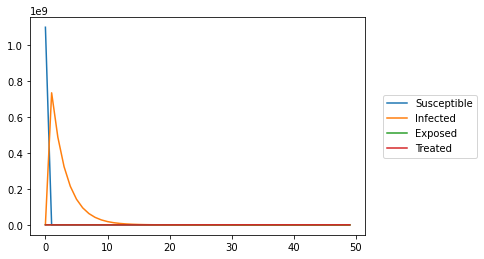

In [5]:
pyplot.plot(t,Nfit[:,0])
pyplot.plot(t,Nfit[:,1])
pyplot.plot(t,Nfit[:,2])
pyplot.plot(t,Nfit[:,3])
pyplot.legend(["Susceptible","Infected","Exposed","Treated"],loc = "center right",bbox_to_anchor=(1.35, 0.5))
#still need to determine reasonable initial conditions...

      fun: 4972866393054.758
 hess_inv: array([[0.00714526, 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 6
     njev: 16
   status: 0
  success: True
        x: array([4.95641152e+05, 1.00000000e+00, 2.00000000e+06]) 

      fun: 792367860.3848813
 hess_inv: array([[ 8.69771381e-02, -6.90762285e-09, -1.11449318e-01],
       [-6.90762285e-09,  5.63106150e-16,  8.50742468e-09],
       [-1.11449318e-01,  8.50742468e-09,  1.57789104e-01]])
      jac: array([-9.60000000e+01,  1.31620141e+09, -8.80000000e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 616
      nit: 93
     njev: 151
   status: 2
  success: False
        x: array([1.55866391e+05, 2.73131893e-02, 1.47337164e+04])


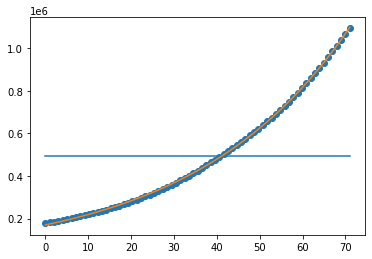

In [7]:
# Population data:
pop = np.array([179007, 182373, 185912, 189614, 193474, 197490, 201664, 206004, 210521, 215228, 220138, 225260, 230596, 236142, 241888, 247831, 253972, 260325, 266914, 273767, 280908, 288346, 296085, 304135, 312505, 321201, 330232, 339601, 349297, 359305, 369614, 380212, 391107, 402322, 413893, 425841, 438184, 450902, 463932, 477186, 490605, 504171, 517913, 531880, 546143, 560759, 575760, 591148, 606928, 623097, 639661, 656627, 674033, 691958, 710500, 729733, 749688, 770357, 791717, 813730, 836364, 859611, 883473, 907934, 932975, 958577, 984734, 1011429, 1038627, 1066283, 1094366])

# Plot given data
t = np.linspace(0,len(pop),len(pop))
pyplot.scatter(t,pop)

# Logarithmic populaiton function
def logy(t,K,alpha,beta):
    return(K/(1 + np.exp(-alpha*t - beta)))

# Objective function
def h(theta):
    sse = 0.0
    for i in range(0,len(pop)):
        sse += (pop[i] - logy(t[i],theta[0],theta[1],theta[2]))**2
    return(sse)

# Optimize Parameters
result = optimize.minimize(h,[1e7,1,2e6])
print(result,"\n")

# Plot Optimized function
t_future = np.linspace(0,len(pop),len(pop))
pyplot.plot(t_future,logy(t_future,result.x[0],result.x[1],result.x[2]))
  # For some reason, the code is only optimizing the K value
  # This results in a bad optimization and therefore poor fit of model to data

# Repeat for Exponential model:
def expo(t,a,b,c):
    return(a*np.exp(t*b)+c)

def h2(eta):
    obj = 0.0
    for i in range(0,len(pop)):
        obj += (pop[i] - expo(t[i],eta[0],eta[1],eta[2]))**2
    return(obj)

result2 = optimize.minimize(h2,[0.1,0.2,0.1])
print(result2)
pyplot.plot(t_future,expo(t_future,result2.x[0],result2.x[1],result2.x[2]))